In [ ]:
pip install ipywidgets

In [ ]:
pip install qutip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from qutip import basis, Bloch, sigmax, sigmay, sigmaz

In [ ]:
# Definir los estados base |0⟩ y |1⟩
ket0 = basis(2, 0)  # Vector columna [1, 0]
ket1 = basis(2, 1)  # Vector columna [0, 1]

# Estado arbitrario |\psi⟩ = (1/√2)(|0⟩ + |1⟩)
coeff = 1 / np.sqrt(2)
psi = coeff * ket0 + coeff * ket1

# Estado en base Y, |\psi_{y} = (1/√2)(|0⟩ + i|1⟩)
coeff = 1 / np.sqrt(2)
psi_y = coeff * ket0 + coeff * 1j * ket1

# Estado arbitrario |\psi_{2} = (1/√3)|0⟩ + (√2/√3)|1⟩
psi2 = np.sqrt(1/3) * ket0 + np.sqrt(2/3) * ket1

In [ ]:
# Producto interno entre |0⟩ y |0⟩
inner_00 = ket0.dag() * ket0 # Mismo estado base.
print(f'⟨0|0⟩ = {inner_00}')

# Producto interno entre |0⟩ y |1⟩
inner_01 = ket0.dag() * ket1 # Estados base ortonormales.
print(f'⟨0|1⟩ = {inner_01}')

# Producto interno entre |\psi⟩ y |0⟩, y roducto interno entre |0⟩ y |\psi⟩
inner_psi0 = psi.dag() * ket0
inner_0psi = ket0.dag() * psi
print(f'⟨ψ|0⟩ = {inner_psi0},', f'⟨0|ψ⟩ = {inner_0psi}')

# Producto interno entre |\psi⟩ y |1⟩, y roducto interno entre |1⟩ y |\psi⟩
inner_psi1 = psi.dag() * ket1
inner_1psi = ket1.dag() * psi
print(f'⟨ψ|1⟩ = {inner_psi1},', f'⟨1|ψ⟩ = {inner_1psi}')

# Producto interno entre |\psi_{2}⟩ y |0⟩, y roducto interno entre |0⟩ y |\psi_{2}⟩
inner_psi20 = psi2.dag() * ket0
inner_0psi2 = ket0.dag() * psi2
print(f'⟨ψ2|0⟩ = {inner_psi20},', f'⟨0|ψ2⟩ = {inner_0psi2}')

# Producto interno entre |\psi_{2}⟩ y |1⟩, y roducto interno entre |1⟩ y |\psi_{2}⟩
inner_psi21 = psi2.dag() * ket1
inner_1psi2 = ket1.dag() * psi2
print(f'⟨ψ2|1⟩ = {inner_psi21},', f'⟨1|ψ2⟩ = {inner_1psi2}')

# Producto interno entre |\psi_{1}⟩ y |\psi_{2}⟩, y roducto interno entre |\psi_{2}⟩ y |\psi_{1}⟩
inner_psi1psi2 = psi.dag() * psi2
inner_psi2psi1 = psi2.dag() * psi
print(f'⟨ψ|ψ2⟩ = {inner_psi1psi2},', f'⟨ψ2|ψ⟩ = {inner_psi2psi1}')

⟨0|0⟩ = (1+0j)
⟨0|1⟩ = 0j
⟨ψ|0⟩ = (0.7071067811865475+0j), ⟨0|ψ⟩ = (0.7071067811865475+0j)
⟨ψ|1⟩ = (0.7071067811865475+0j), ⟨1|ψ⟩ = (0.7071067811865475+0j)
⟨ψ2|0⟩ = (0.5773502691896257+0j), ⟨0|ψ2⟩ = (0.5773502691896257+0j)
⟨ψ2|1⟩ = (0.816496580927726+0j), ⟨1|ψ2⟩ = (0.816496580927726+0j)
⟨ψ|ψ2⟩ = (0.9855985596534886+0j), ⟨ψ2|ψ⟩ = (0.9855985596534886+0j)


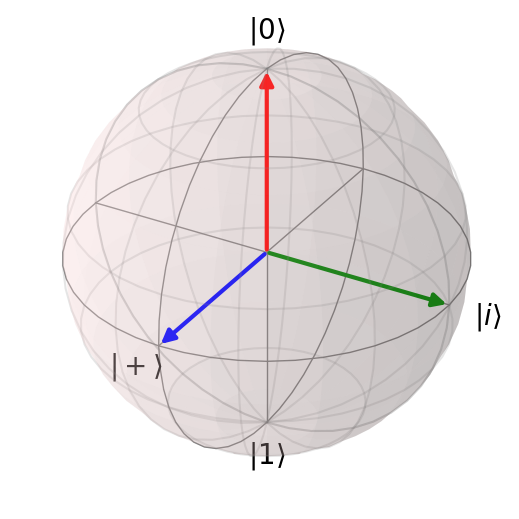

In [ ]:
# Crear la esfera de Bloch
b = Bloch()

# Añadir los vectores de estado a la esfera
b.add_states([ket0, psi, psi_y])

# Configurar colores y etiquetas
b.vector_color = ['r', 'b', 'g']
b.xlabel = ['$|+⟩$', '']
b.ylabel = ['$|i⟩$', '']
b.zlabel = ['$|0⟩$', '$|1⟩$']
b.legend = ['$|0⟩$', '$|1⟩$', '$|\psi⟩$']

# Mostrar la esfera de Bloch
b.show()

In [ ]:
# Función para obtener coordenadas en la esfera de Bloch
def bloch_coords(state):
    x = np.real((state.dag() * sigmax() * state))
    y = np.real((state.dag() * sigmay() * state))
    z = np.real((state.dag() * sigmaz() * state))
    return np.array([x, y, z])

# Coordenadas de los estados
coords_0 = bloch_coords(ket0)
coords_1 = bloch_coords(ket1)
coords_psi = bloch_coords(psi)
coords_psi2 = bloch_coords(psi2)
coords_psi_y = bloch_coords(psi_y)

# Producto punto y ángulo (|0⟩ y |ψ⟩)
dot_product_0psi = np.dot(coords_0, coords_psi)
angle_rad_0psi = np.arccos(dot_product_0psi)
angle_deg_0psi = np.degrees(angle_rad_0psi)

# Producto punto y ángulo (|1⟩ y |ψ⟩)
dot_product_1psi = np.dot(coords_1, coords_psi)
angle_rad_1psi = np.arccos(dot_product_1psi)
angle_deg_1psi = np.degrees(angle_rad_1psi)

# Producto punto y ángulo (|0⟩ y |ψ2⟩)
dot_product_0psi2 = np.dot(coords_0, coords_psi2)
angle_rad_0psi2 = np.arccos(dot_product_0psi2)
angle_deg_0psi2 = np.degrees(angle_rad_0psi2)

# Producto punto y ángulo (|1⟩ y |ψ2⟩)
dot_product_1psi2 = np.dot(coords_1, coords_psi2)
angle_rad_1psi2 = np.arccos(dot_product_1psi2)
angle_deg_1psi2 = np.degrees(angle_rad_1psi2)

# Producto punto y ángulo (|ψ⟩ y |ψ2⟩)
dot_product_psi1psi2 = np.dot(coords_psi, coords_psi2)
angle_rad_psi1psi2 = np.arccos(dot_product_psi1psi2)
angle_deg_psi1psi2 = np.degrees(angle_rad_psi1psi2)

print(f'Ángulo entre |0⟩ y |ψ⟩: {angle_deg_0psi:.2f} grados')
print(f'Ángulo entre |1⟩ y |ψ⟩: {angle_deg_1psi:.2f} grados')
print(f'Ángulo entre |0⟩ y |ψ2⟩: {angle_deg_0psi2:.2f} grados')
print(f'Ángulo entre |1⟩ y |ψ2⟩: {angle_deg_1psi2:.2f} grados')
print(f'Ángulo entre |ψ⟩ y |ψ2⟩: {angle_deg_psi1psi2:.2f} grados')

Ángulo entre |0⟩ y |ψ⟩: 90.00 grados
Ángulo entre |1⟩ y |ψ⟩: 90.00 grados
Ángulo entre |0⟩ y |ψ2⟩: 109.47 grados
Ángulo entre |1⟩ y |ψ2⟩: 70.53 grados
Ángulo entre |ψ⟩ y |ψ2⟩: 19.47 grados


Ángulo entre |0⟩ y |ψ⟩: 90.00°
Ángulo entre |1⟩ y |ψ⟩: 90.00°


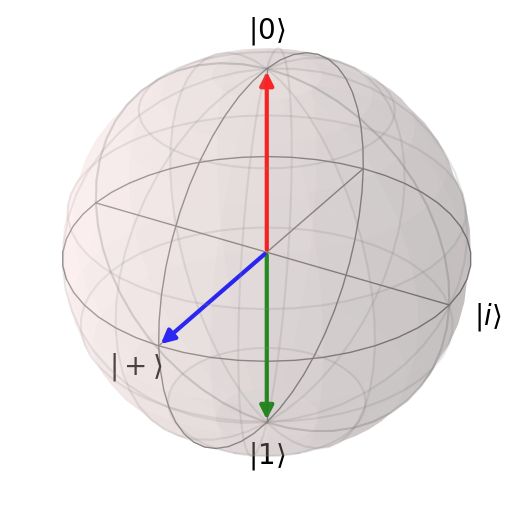

In [ ]:
# Crear la esfera de Bloch
b = Bloch()

# Añadir los estados
b.add_states([ket0, ket1, psi])

# Configurar colores y etiquetas
b.vector_color = ['r', 'g', 'b']
b.xlabel = ['$|+⟩$', '']
b.ylabel = ['$|i⟩$', '']
b.zlabel = ['$|0⟩$', '$|1⟩$']
b.legend = ['$|0⟩$', '$|\psi⟩$']

# Establecer el título con el ángulo
print(f'Ángulo entre |0⟩ y |ψ⟩: {angle_deg_0psi:.2f}°')
print(f'Ángulo entre |1⟩ y |ψ⟩: {angle_deg_1psi:.2f}°')

# Mostrar la esfera de Bloch
b.show()

Ángulo entre |0⟩ y |ψ2⟩: 109.47°
Ángulo entre |1⟩ y |ψ2⟩: 70.53°


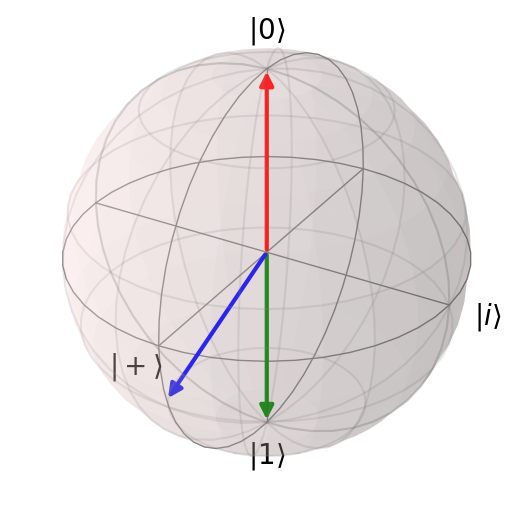

In [ ]:
# Crear la esfera de Bloch
b = Bloch()

# Añadir los estados
b.add_states([ket0, ket1, psi2])

# Configurar colores y etiquetas
b.vector_color = ['r', 'g', 'b']
b.xlabel = ['$|+⟩$', '']
b.ylabel = ['$|i⟩$', '']
b.zlabel = ['$|0⟩$', '$|1⟩$']
b.legend = ['$|0⟩$', '$|\psi⟩$']

# Establecer el título con el ángulo
print(f'Ángulo entre |0⟩ y |ψ2⟩: {angle_deg_0psi2:.2f}°')
print(f'Ángulo entre |1⟩ y |ψ2⟩: {angle_deg_1psi2:.2f}°')

# Mostrar la esfera de Bloch
b.show()

Ángulo entre |ψ⟩ y |ψ2⟩: 19.47°


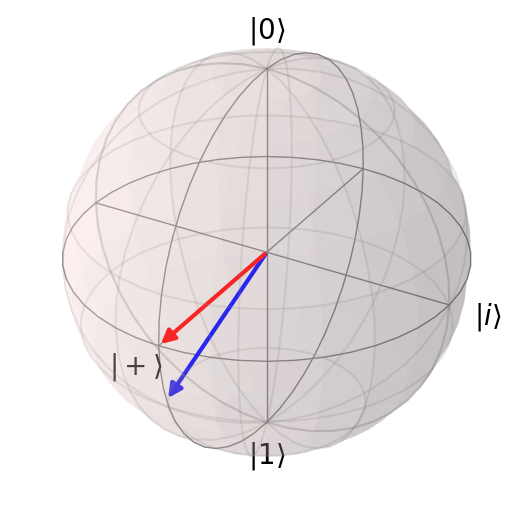

In [ ]:
# Crear la esfera de Bloch
b = Bloch()

# Añadir los estados
b.add_states([psi, psi2])

# Configurar colores y etiquetas
b.vector_color = ['r', 'b']
b.xlabel = ['$|+⟩$', '']
b.ylabel = ['$|i⟩$', '']
b.zlabel = ['$|0⟩$', '$|1⟩$']
b.legend = ['$|0⟩$', '$|\psi⟩$']

# Establecer el título con el ángulo
print(f'Ángulo entre |ψ⟩ y |ψ2⟩: {angle_deg_psi1psi2:.2f}°')

# Mostrar la esfera de Bloch
b.show()